In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,LabelEncoder
from xgboost import XGBClassifier
import catboost as ctb
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix,recall_score,precision_score

In [3]:
import shap
from matplotlib import pyplot as plt
import seaborn as sns

# Dataset Read

In [4]:
data  = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
df = data.copy()

In [6]:
df = df.rename(columns={'family_history_with_overweight': 'family_history'})

In [7]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  NObeyesdad      2111 non-null   object 
dtypes: float64(8), object(9)
memory u

# Unique Value of Object Attribute

In [9]:
for col in data.select_dtypes('object'):
    print(f'{col:-<40} {data[col].unique()}')

Gender---------------------------------- ['Female' 'Male']
family_history_with_overweight---------- ['yes' 'no']
FAVC------------------------------------ ['no' 'yes']
CAEC------------------------------------ ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE----------------------------------- ['no' 'yes']
SCC------------------------------------- ['no' 'yes']
CALC------------------------------------ ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS---------------------------------- ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad------------------------------ ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [10]:
print(df['NObeyesdad'].value_counts())
print("   ")
print(df['NObeyesdad'].value_counts(normalize=True))

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
   
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_II    0.137376
Overweight_Level_I     0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64


In [11]:
for col in data.select_dtypes('float64'):
    print(col)

Age
Height
Weight
FCVC
NCP
CH2O
FAF
TUE


In [12]:
def split(df):
    trainset, testset = train_test_split(df, test_size=0.20, random_state=0,stratify=df['NObeyesdad'])
    return trainset,testset

In [13]:
def encodage(df):
    code = {'yes':1,
            'no':0,
            'Female':1,
            'Male':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Automobile':1,
            'Motorbike':2,
            'Bike':3, 
            'Public_Transportation':4,
            'Walking':5, 
            'Insufficient_Weight':0,
            'Normal_Weight':1 ,
            'Overweight_Level_I':2 ,
            'Overweight_Level_II':3,
            'Obesity_Type_I':4,            
            'Obesity_Type_II':5,
            'Obesity_Type_III':6
           }
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df

In [14]:
def preprocessing(df):
    df = encodage(df)
    X = df.drop('NObeyesdad',axis = 1)
    Y = df['NObeyesdad']
    return X, Y

In [15]:
def GetReadyForML (df):
    trainset, testset = split (df)
    X_train, Y_train = preprocessing(trainset)
    X_test, Y_test = preprocessing(testset)
    return X_train, Y_train, X_test, Y_test

In [22]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    model_acc = accuracy_score(Y_test, ypred)
    f1=f1_score(Y_test, ypred,average='weighted')
    re=recall_score(Y_test, ypred,average='weighted')
    pe=precision_score(Y_test, ypred,average='weighted')
    print('Test Data') 
    sns.heatmap(confusion_matrix(Y_test, ypred), annot=True)
    
    print(classification_report(Y_test, ypred))
    print('Accuracy : ' + str(model_acc))
    print('F1_score : ' + str(f1))
    print('Recall : ' + str(re))
    print('pression : ' + str(pe))
    
    pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))
#     #'''
#     ypred2 = model.predict(X_train)
#     model_acc2 = accuracy_score(Y_train, ypred2)
#     f1_=f1_score(Y_train, ypred2,average='weighted')
#     re_=recall_score(Y_train, ypred2,average='weighted')
#     pe_=precision_score(Y_train, ypred2,average='weighted')
#     print('Train Data') 
#     print(confusion_matrix(Y_train, ypred2))  
#     print(classification_report(Y_train, ypred2))
#     print('Accuracy : ' + str(model_acc2))
#     print('F1_score : ' + str(f1_))
#     print('Recall : ' + str(re_))
#     print('Pression : ' + str(pe_))
#    # '''
#     return model_acc

In [28]:
def catboost():
#     df = data.copy()
#     X_train, Y_train, X_test, Y_test = GetReadyForML(df)
    model_CBC = ctb.CatBoostClassifier()
    model_CBC.fit(X_train, Y_train)
    predicted_y = model_CBC.predict(X_test)
    expected_y  = Y_test
    print(metrics.classification_report(expected_y, predicted_y))
    print(metrics.confusion_matrix(expected_y, predicted_y))
    
    model_acc = accuracy_score(Y_test, predicted_y)
    f1=f1_score(Y_test, predicted_y,average='weighted')
    re=recall_score(Y_test, predicted_y,average='weighted')
    pe=precision_score(Y_test, predicted_y,average='weighted')
    
    print('Accuracy : ' + str(model_acc))
    print('F1_score : ' + str(f1))
    print('Recall : ' + str(re))
    print('pression : ' + str(pe))
    
    
    explainer = shap.TreeExplainer(model_CBC)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    return model_CBC

# Ml algo declare

In [18]:
xg = XGBClassifier()
dt = DecisionTreeClassifier(random_state=0)
ad = AdaBoostClassifier(random_state=0)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
lg = LogisticRegression()
rf=RandomForestClassifier()

In [19]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Learning rate set to 0.081268
0:	learn: 1.7425688	total: 32.3ms	remaining: 32.3s
1:	learn: 1.6072024	total: 69.2ms	remaining: 34.5s
2:	learn: 1.4876605	total: 95.2ms	remaining: 31.7s
3:	learn: 1.3771548	total: 118ms	remaining: 29.4s
4:	learn: 1.3008707	total: 142ms	remaining: 28.2s
5:	learn: 1.2393065	total: 163ms	remaining: 27.1s
6:	learn: 1.1804442	total: 182ms	remaining: 25.9s
7:	learn: 1.1161910	total: 199ms	remaining: 24.7s
8:	learn: 1.0595066	total: 228ms	remaining: 25.1s
9:	learn: 1.0071656	total: 244ms	remaining: 24.2s
10:	learn: 0.9628547	total: 258ms	remaining: 23.2s
11:	learn: 0.9182214	total: 273ms	remaining: 22.5s
12:	learn: 0.8799367	total: 290ms	remaining: 22s
13:	learn: 0.8436522	total: 311ms	remaining: 21.9s
14:	learn: 0.8133694	total: 327ms	remaining: 21.4s
15:	learn: 0.7866169	total: 344ms	remaining: 21.2s
16:	learn: 0.7606817	total: 361ms	remaining: 20.9s
17:	learn: 0.7355479	total: 377ms	remaining: 20.6s
18:	learn: 0.7142625	total: 391ms	remaining: 20.2s
19:	learn:

172:	learn: 0.1065526	total: 3.02s	remaining: 14.5s
173:	learn: 0.1060681	total: 3.04s	remaining: 14.4s
174:	learn: 0.1055193	total: 3.06s	remaining: 14.4s
175:	learn: 0.1050250	total: 3.07s	remaining: 14.4s
176:	learn: 0.1042505	total: 3.09s	remaining: 14.4s
177:	learn: 0.1035460	total: 3.1s	remaining: 14.3s
178:	learn: 0.1031814	total: 3.12s	remaining: 14.3s
179:	learn: 0.1022994	total: 3.14s	remaining: 14.3s
180:	learn: 0.1019550	total: 3.15s	remaining: 14.3s
181:	learn: 0.1015516	total: 3.17s	remaining: 14.2s
182:	learn: 0.1009147	total: 3.18s	remaining: 14.2s
183:	learn: 0.1005582	total: 3.19s	remaining: 14.2s
184:	learn: 0.0996684	total: 3.21s	remaining: 14.2s
185:	learn: 0.0992681	total: 3.23s	remaining: 14.1s
186:	learn: 0.0984033	total: 3.24s	remaining: 14.1s
187:	learn: 0.0977533	total: 3.25s	remaining: 14s
188:	learn: 0.0973566	total: 3.27s	remaining: 14s
189:	learn: 0.0968064	total: 3.28s	remaining: 14s
190:	learn: 0.0953799	total: 3.29s	remaining: 13.9s
191:	learn: 0.09488

339:	learn: 0.0497653	total: 5.22s	remaining: 10.1s
340:	learn: 0.0495478	total: 5.23s	remaining: 10.1s
341:	learn: 0.0494389	total: 5.25s	remaining: 10.1s
342:	learn: 0.0493366	total: 5.26s	remaining: 10.1s
343:	learn: 0.0492360	total: 5.27s	remaining: 10.1s
344:	learn: 0.0490048	total: 5.28s	remaining: 10s
345:	learn: 0.0488820	total: 5.29s	remaining: 10s
346:	learn: 0.0487054	total: 5.31s	remaining: 9.98s
347:	learn: 0.0485920	total: 5.32s	remaining: 9.96s
348:	learn: 0.0484893	total: 5.33s	remaining: 9.94s
349:	learn: 0.0483523	total: 5.34s	remaining: 9.92s
350:	learn: 0.0482017	total: 5.35s	remaining: 9.9s
351:	learn: 0.0479577	total: 5.37s	remaining: 9.88s
352:	learn: 0.0478266	total: 5.38s	remaining: 9.86s
353:	learn: 0.0477034	total: 5.39s	remaining: 9.84s
354:	learn: 0.0475455	total: 5.4s	remaining: 9.82s
355:	learn: 0.0473228	total: 5.41s	remaining: 9.79s
356:	learn: 0.0472475	total: 5.43s	remaining: 9.78s
357:	learn: 0.0471401	total: 5.44s	remaining: 9.76s
358:	learn: 0.0469

498:	learn: 0.0319781	total: 7.85s	remaining: 7.88s
499:	learn: 0.0319057	total: 7.88s	remaining: 7.88s
500:	learn: 0.0318288	total: 7.89s	remaining: 7.86s
501:	learn: 0.0317624	total: 7.91s	remaining: 7.85s
502:	learn: 0.0316939	total: 7.93s	remaining: 7.83s
503:	learn: 0.0315382	total: 7.95s	remaining: 7.82s
504:	learn: 0.0314209	total: 7.96s	remaining: 7.8s
505:	learn: 0.0313291	total: 7.98s	remaining: 7.79s
506:	learn: 0.0312917	total: 8s	remaining: 7.78s
507:	learn: 0.0311786	total: 8.02s	remaining: 7.76s
508:	learn: 0.0310611	total: 8.04s	remaining: 7.75s
509:	learn: 0.0310082	total: 8.05s	remaining: 7.74s
510:	learn: 0.0309353	total: 8.07s	remaining: 7.73s
511:	learn: 0.0308584	total: 8.09s	remaining: 7.71s
512:	learn: 0.0308129	total: 8.11s	remaining: 7.7s
513:	learn: 0.0307441	total: 8.13s	remaining: 7.69s
514:	learn: 0.0307012	total: 8.15s	remaining: 7.68s
515:	learn: 0.0306441	total: 8.18s	remaining: 7.67s
516:	learn: 0.0305951	total: 8.2s	remaining: 7.66s
517:	learn: 0.0305

662:	learn: 0.0223169	total: 10.8s	remaining: 5.48s
663:	learn: 0.0222444	total: 10.8s	remaining: 5.47s
664:	learn: 0.0222095	total: 10.8s	remaining: 5.45s
665:	learn: 0.0221643	total: 10.8s	remaining: 5.43s
666:	learn: 0.0220995	total: 10.9s	remaining: 5.42s
667:	learn: 0.0220674	total: 10.9s	remaining: 5.4s
668:	learn: 0.0220212	total: 10.9s	remaining: 5.39s
669:	learn: 0.0219730	total: 10.9s	remaining: 5.37s
670:	learn: 0.0219416	total: 10.9s	remaining: 5.36s
671:	learn: 0.0218954	total: 10.9s	remaining: 5.34s
672:	learn: 0.0218608	total: 11s	remaining: 5.33s
673:	learn: 0.0218093	total: 11s	remaining: 5.31s
674:	learn: 0.0217712	total: 11s	remaining: 5.3s
675:	learn: 0.0217294	total: 11s	remaining: 5.28s
676:	learn: 0.0216951	total: 11s	remaining: 5.26s
677:	learn: 0.0216554	total: 11s	remaining: 5.25s
678:	learn: 0.0215869	total: 11.1s	remaining: 5.23s
679:	learn: 0.0215339	total: 11.1s	remaining: 5.21s
680:	learn: 0.0215046	total: 11.1s	remaining: 5.2s
681:	learn: 0.0214769	total

826:	learn: 0.0170943	total: 13.5s	remaining: 2.83s
827:	learn: 0.0170521	total: 13.6s	remaining: 2.81s
828:	learn: 0.0170245	total: 13.6s	remaining: 2.8s
829:	learn: 0.0170136	total: 13.6s	remaining: 2.78s
830:	learn: 0.0169983	total: 13.6s	remaining: 2.77s
831:	learn: 0.0169869	total: 13.6s	remaining: 2.75s
832:	learn: 0.0169681	total: 13.6s	remaining: 2.73s
833:	learn: 0.0169034	total: 13.7s	remaining: 2.72s
834:	learn: 0.0168245	total: 13.7s	remaining: 2.7s
835:	learn: 0.0168008	total: 13.7s	remaining: 2.69s
836:	learn: 0.0167794	total: 13.7s	remaining: 2.67s
837:	learn: 0.0167496	total: 13.7s	remaining: 2.65s
838:	learn: 0.0167226	total: 13.7s	remaining: 2.64s
839:	learn: 0.0166956	total: 13.8s	remaining: 2.62s
840:	learn: 0.0166833	total: 13.8s	remaining: 2.6s
841:	learn: 0.0166510	total: 13.8s	remaining: 2.59s
842:	learn: 0.0166206	total: 13.8s	remaining: 2.57s
843:	learn: 0.0165968	total: 13.8s	remaining: 2.56s
844:	learn: 0.0165713	total: 13.8s	remaining: 2.54s
845:	learn: 0.0

987:	learn: 0.0135384	total: 16.5s	remaining: 200ms
988:	learn: 0.0135250	total: 16.5s	remaining: 183ms
989:	learn: 0.0135095	total: 16.5s	remaining: 167ms
990:	learn: 0.0135016	total: 16.5s	remaining: 150ms
991:	learn: 0.0134942	total: 16.6s	remaining: 133ms
992:	learn: 0.0134678	total: 16.6s	remaining: 117ms
993:	learn: 0.0134534	total: 16.6s	remaining: 100ms
994:	learn: 0.0134391	total: 16.6s	remaining: 83.4ms
995:	learn: 0.0134192	total: 16.6s	remaining: 66.7ms
996:	learn: 0.0134044	total: 16.6s	remaining: 50ms
997:	learn: 0.0133918	total: 16.7s	remaining: 33.4ms
998:	learn: 0.0133740	total: 16.7s	remaining: 16.7ms
999:	learn: 0.0133618	total: 16.7s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.93      0.95        58
           2       0.89      0.97      0.93        58
           3       0.98      0.90      0.94        58
           4       0.96      0.99      0.97        7

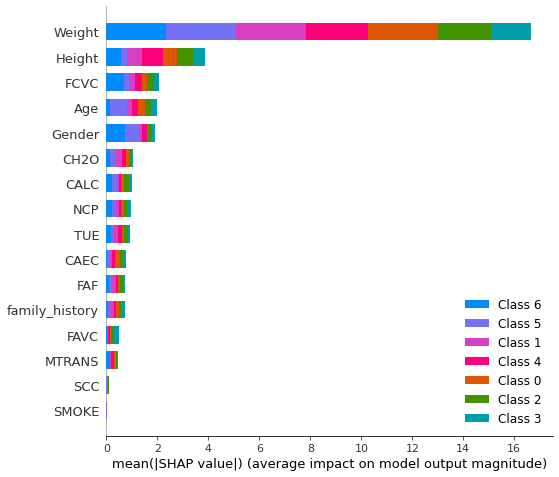

<AxesSubplot:>

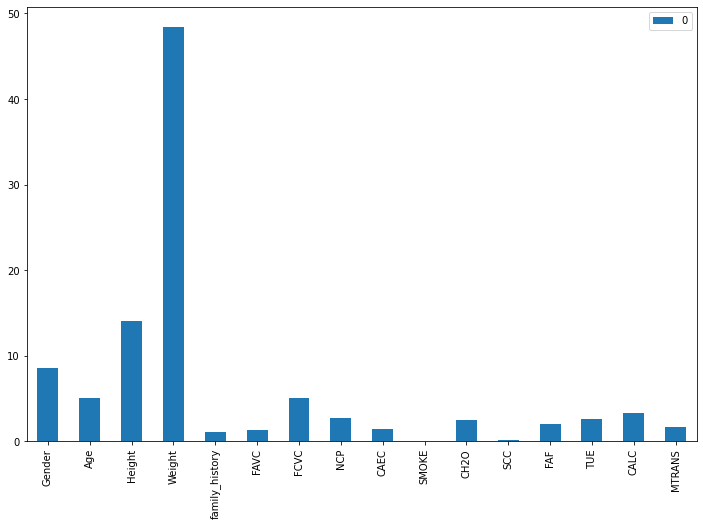

In [29]:
model_CBC = catboost()
pd.DataFrame(model_CBC.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.90      0.95      0.92        58
           2       0.96      0.95      0.96        58
           3       0.98      0.97      0.97        58
           4       1.00      0.96      0.98        70
           5       0.97      1.00      0.98        60
           6       1.00      1.00      1.00        65

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Accuracy : 0.9716312056737588
F1_score : 0.9717782730419624
Recall : 0.9716312056737588
pression : 0.972356894839948


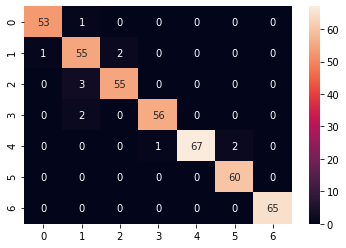

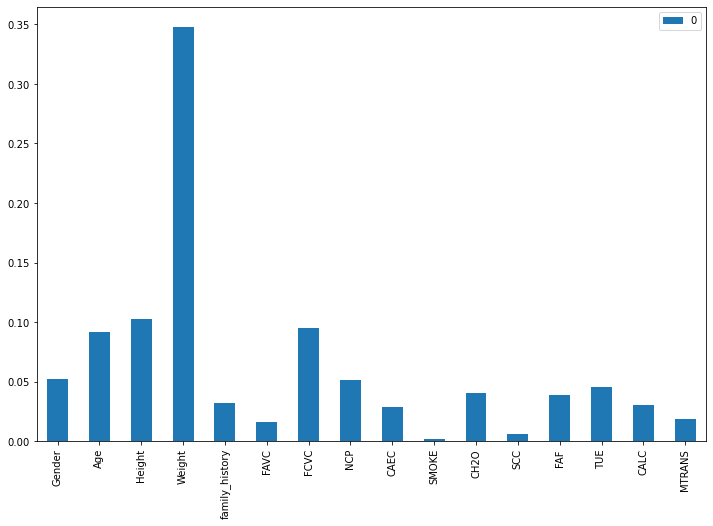

In [30]:
evaluation(rf)

Test Data
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.84      0.83      0.83        58
           2       0.86      0.93      0.89        58
           3       0.96      0.91      0.94        58
           4       0.92      0.94      0.93        70
           5       0.97      0.93      0.95        60
           6       1.00      1.00      1.00        65

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.92      0.92       423

Accuracy : 0.9243498817966903
F1_score : 0.9245167493959944
Recall : 0.9243498817966903
pression : 0.925459880661146


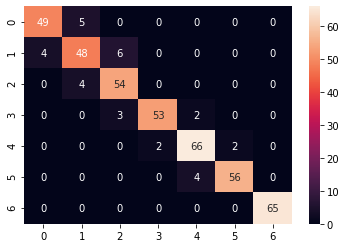

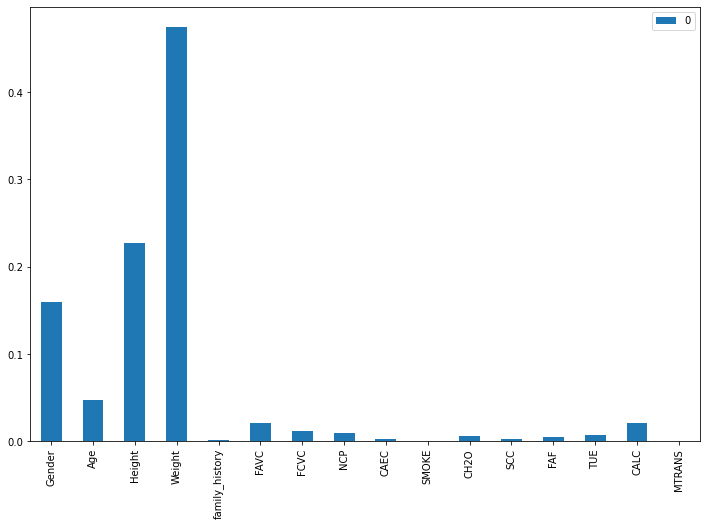

In [31]:
evaluation(dt)

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.97      0.95        58
           2       0.92      0.93      0.92        58
           3       0.98      0.90      0.94        58
           4       0.96      0.96      0.96        70
           5       0.97      1.00      0.98        60
           6       1.00      1.00      1.00        65

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Accuracy : 0.9645390070921985
F1_score : 0.964416181515494
Recall : 0.9645390070921985
pression : 0.964984055797721


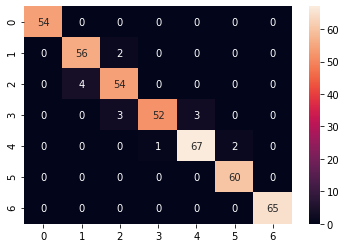

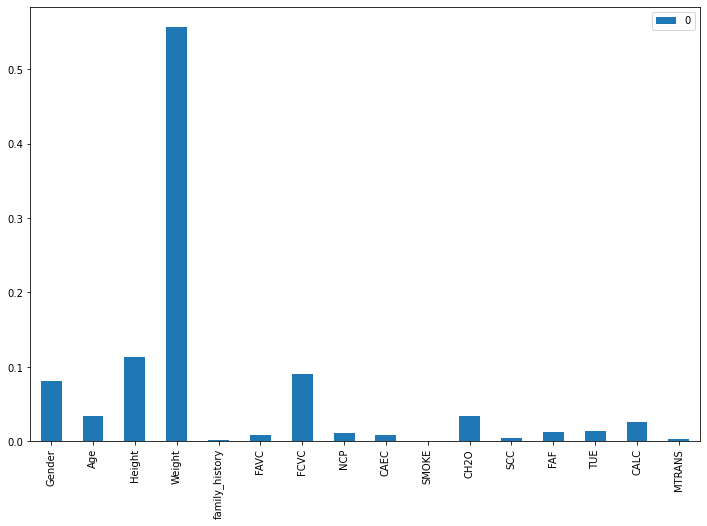

In [32]:
evaluation(gb)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.33      0.45      0.38        58
           2       0.40      0.07      0.12        58
           3       0.29      0.81      0.43        58
           4       0.20      0.49      0.28        70
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        65

    accuracy                           0.26       423
   macro avg       0.17      0.26      0.17       423
weighted avg       0.17      0.26      0.17       423

Accuracy : 0.2624113475177305
F1_score : 0.17327128461154692
Recall : 0.2624113475177305
pression : 0.17228643142748737


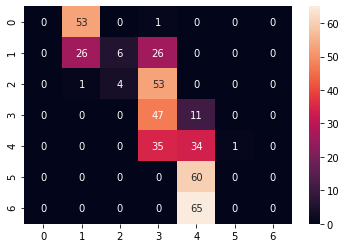

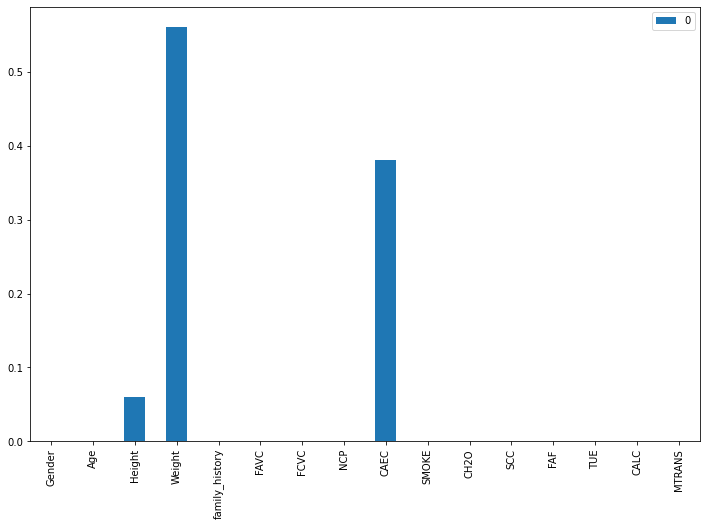

In [34]:
evaluation(ad)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test Data
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        54
           1       0.50      0.45      0.47        58
           2       0.49      0.45      0.47        58
           3       0.47      0.38      0.42        58
           4       0.55      0.57      0.56        70
           5       0.83      0.90      0.86        60
           6       0.89      1.00      0.94        65

    accuracy                           0.66       423
   macro avg       0.65      0.66      0.65       423
weighted avg       0.65      0.66      0.65       423

Accuracy : 0.6643026004728132
F1_score : 0.6539019440270719
Recall : 0.6643026004728132
pression : 0.6474723331380015


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

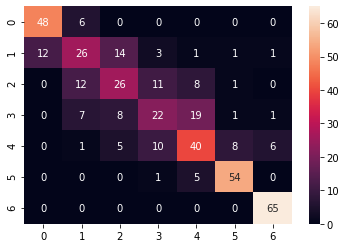

In [36]:
evaluation(lg)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.95      0.96        58
           2       0.92      0.98      0.95        58
           3       0.98      0.93      0.96        58
           4       0.99      0.96      0.97        70
           5       0.95      1.00      0.98        60
           6       1.00      1.00      1.00        65

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Accuracy : 0.9739952718676123
F1_score : 0.9740097883165323
Recall : 0.97399527186

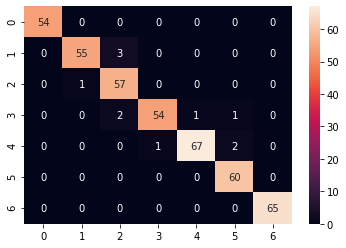

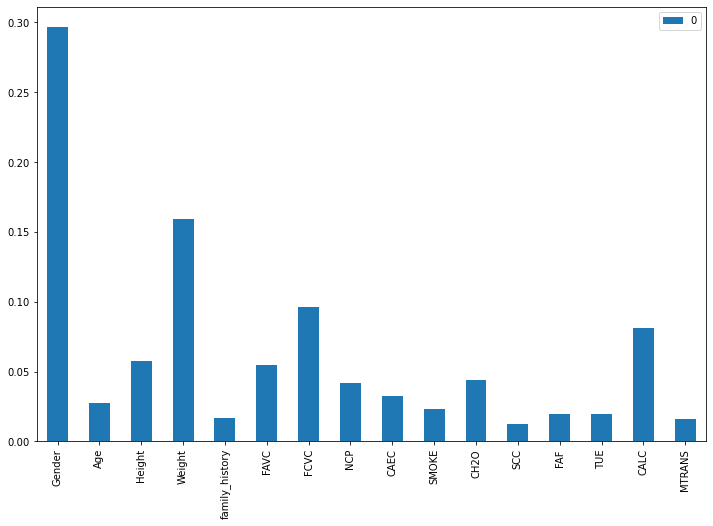

In [37]:
evaluation(xg)

Test Data
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       0.91      0.55      0.69        58
           2       0.78      0.91      0.84        58
           3       0.82      0.81      0.82        58
           4       0.81      0.86      0.83        70
           5       0.94      0.85      0.89        60
           6       0.89      1.00      0.94        65

    accuracy                           0.86       423
   macro avg       0.86      0.85      0.85       423
weighted avg       0.86      0.86      0.85       423

Accuracy : 0.8557919621749409
F1_score : 0.8502165837518535
Recall : 0.8557919621749409
pression : 0.8614454113516031


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

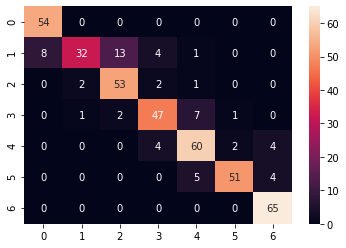

In [38]:
evaluation(knn)

# Create New attribute

In [39]:
IMC = df["Weight"]/((df["Height"])**2)
df.insert(loc = 4, column='IMC', value=IMC)

In [40]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Learning rate set to 0.081268
0:	learn: 1.6048682	total: 19.3ms	remaining: 19.3s
1:	learn: 1.4150744	total: 39.9ms	remaining: 19.9s
2:	learn: 1.2994458	total: 62.7ms	remaining: 20.8s
3:	learn: 1.1332355	total: 80.1ms	remaining: 20s
4:	learn: 1.0061591	total: 98.4ms	remaining: 19.6s
5:	learn: 0.9216093	total: 115ms	remaining: 19.1s
6:	learn: 0.8255849	total: 134ms	remaining: 18.9s
7:	learn: 0.7553712	total: 151ms	remaining: 18.7s
8:	learn: 0.6917593	total: 172ms	remaining: 18.9s
9:	learn: 0.6401351	total: 189ms	remaining: 18.7s
10:	learn: 0.5959475	total: 206ms	remaining: 18.6s
11:	learn: 0.5571097	total: 225ms	remaining: 18.6s
12:	learn: 0.5163191	total: 241ms	remaining: 18.3s
13:	learn: 0.4910807	total: 258ms	remaining: 18.1s
14:	learn: 0.4572210	total: 274ms	remaining: 18s
15:	learn: 0.4289312	total: 289ms	remaining: 17.8s
16:	learn: 0.4033919	total: 312ms	remaining: 18s
17:	learn: 0.3762713	total: 331ms	remaining: 18s
18:	learn: 0.3546986	total: 347ms	remaining: 17.9s
19:	learn: 0.3

164:	learn: 0.0374268	total: 2.8s	remaining: 14.2s
165:	learn: 0.0371818	total: 2.81s	remaining: 14.1s
166:	learn: 0.0369101	total: 2.83s	remaining: 14.1s
167:	learn: 0.0365860	total: 2.85s	remaining: 14.1s
168:	learn: 0.0362889	total: 2.86s	remaining: 14.1s
169:	learn: 0.0359789	total: 2.88s	remaining: 14.1s
170:	learn: 0.0357904	total: 2.89s	remaining: 14s
171:	learn: 0.0355876	total: 2.91s	remaining: 14s
172:	learn: 0.0352935	total: 2.92s	remaining: 14s
173:	learn: 0.0352105	total: 2.94s	remaining: 14s
174:	learn: 0.0349781	total: 2.96s	remaining: 13.9s
175:	learn: 0.0346464	total: 2.97s	remaining: 13.9s
176:	learn: 0.0344120	total: 2.99s	remaining: 13.9s
177:	learn: 0.0342259	total: 3.01s	remaining: 13.9s
178:	learn: 0.0339465	total: 3.03s	remaining: 13.9s
179:	learn: 0.0338293	total: 3.04s	remaining: 13.9s
180:	learn: 0.0334944	total: 3.07s	remaining: 13.9s
181:	learn: 0.0332744	total: 3.08s	remaining: 13.9s
182:	learn: 0.0329400	total: 3.1s	remaining: 13.8s
183:	learn: 0.0326585	

323:	learn: 0.0166674	total: 5.59s	remaining: 11.7s
324:	learn: 0.0166134	total: 5.61s	remaining: 11.6s
325:	learn: 0.0165458	total: 5.62s	remaining: 11.6s
326:	learn: 0.0164406	total: 5.64s	remaining: 11.6s
327:	learn: 0.0164172	total: 5.66s	remaining: 11.6s
328:	learn: 0.0163414	total: 5.67s	remaining: 11.6s
329:	learn: 0.0163327	total: 5.69s	remaining: 11.5s
330:	learn: 0.0162387	total: 5.7s	remaining: 11.5s
331:	learn: 0.0161602	total: 5.72s	remaining: 11.5s
332:	learn: 0.0161274	total: 5.73s	remaining: 11.5s
333:	learn: 0.0160747	total: 5.75s	remaining: 11.5s
334:	learn: 0.0160131	total: 5.77s	remaining: 11.5s
335:	learn: 0.0159706	total: 5.79s	remaining: 11.4s
336:	learn: 0.0158922	total: 5.8s	remaining: 11.4s
337:	learn: 0.0158415	total: 5.82s	remaining: 11.4s
338:	learn: 0.0157765	total: 5.83s	remaining: 11.4s
339:	learn: 0.0157168	total: 5.85s	remaining: 11.4s
340:	learn: 0.0156407	total: 5.86s	remaining: 11.3s
341:	learn: 0.0156075	total: 5.88s	remaining: 11.3s
342:	learn: 0.

491:	learn: 0.0101969	total: 8.34s	remaining: 8.61s
492:	learn: 0.0101642	total: 8.36s	remaining: 8.6s
493:	learn: 0.0101391	total: 8.37s	remaining: 8.58s
494:	learn: 0.0101164	total: 8.39s	remaining: 8.56s
495:	learn: 0.0101070	total: 8.41s	remaining: 8.54s
496:	learn: 0.0100840	total: 8.43s	remaining: 8.53s
497:	learn: 0.0100591	total: 8.44s	remaining: 8.51s
498:	learn: 0.0100309	total: 8.46s	remaining: 8.49s
499:	learn: 0.0100132	total: 8.48s	remaining: 8.48s
500:	learn: 0.0099758	total: 8.49s	remaining: 8.46s
501:	learn: 0.0099593	total: 8.51s	remaining: 8.44s
502:	learn: 0.0099407	total: 8.52s	remaining: 8.42s
503:	learn: 0.0099181	total: 8.54s	remaining: 8.41s
504:	learn: 0.0098930	total: 8.56s	remaining: 8.39s
505:	learn: 0.0098561	total: 8.57s	remaining: 8.37s
506:	learn: 0.0098329	total: 8.59s	remaining: 8.35s
507:	learn: 0.0098115	total: 8.6s	remaining: 8.33s
508:	learn: 0.0097837	total: 8.62s	remaining: 8.31s
509:	learn: 0.0097645	total: 8.63s	remaining: 8.3s
510:	learn: 0.0

658:	learn: 0.0071484	total: 11.1s	remaining: 5.74s
659:	learn: 0.0071434	total: 11.1s	remaining: 5.72s
660:	learn: 0.0071288	total: 11.1s	remaining: 5.71s
661:	learn: 0.0071030	total: 11.1s	remaining: 5.69s
662:	learn: 0.0070946	total: 11.2s	remaining: 5.67s
663:	learn: 0.0070846	total: 11.2s	remaining: 5.66s
664:	learn: 0.0070736	total: 11.2s	remaining: 5.64s
665:	learn: 0.0070603	total: 11.2s	remaining: 5.62s
666:	learn: 0.0070332	total: 11.2s	remaining: 5.6s
667:	learn: 0.0070073	total: 11.2s	remaining: 5.59s
668:	learn: 0.0069975	total: 11.3s	remaining: 5.57s
669:	learn: 0.0069902	total: 11.3s	remaining: 5.55s
670:	learn: 0.0069543	total: 11.3s	remaining: 5.54s
671:	learn: 0.0069361	total: 11.3s	remaining: 5.52s
672:	learn: 0.0069188	total: 11.3s	remaining: 5.5s
673:	learn: 0.0069045	total: 11.3s	remaining: 5.49s
674:	learn: 0.0068982	total: 11.4s	remaining: 5.47s
675:	learn: 0.0068855	total: 11.4s	remaining: 5.45s
676:	learn: 0.0068709	total: 11.4s	remaining: 5.44s
677:	learn: 0.

821:	learn: 0.0054390	total: 13.9s	remaining: 3.01s
822:	learn: 0.0054359	total: 13.9s	remaining: 2.99s
823:	learn: 0.0054272	total: 13.9s	remaining: 2.97s
824:	learn: 0.0054198	total: 13.9s	remaining: 2.96s
825:	learn: 0.0054145	total: 14s	remaining: 2.94s
826:	learn: 0.0054069	total: 14s	remaining: 2.92s
827:	learn: 0.0053976	total: 14s	remaining: 2.9s
828:	learn: 0.0053946	total: 14s	remaining: 2.89s
829:	learn: 0.0053865	total: 14s	remaining: 2.87s
830:	learn: 0.0053816	total: 14s	remaining: 2.85s
831:	learn: 0.0053787	total: 14.1s	remaining: 2.84s
832:	learn: 0.0053703	total: 14.1s	remaining: 2.82s
833:	learn: 0.0053657	total: 14.1s	remaining: 2.8s
834:	learn: 0.0053607	total: 14.1s	remaining: 2.79s
835:	learn: 0.0053557	total: 14.1s	remaining: 2.77s
836:	learn: 0.0053451	total: 14.1s	remaining: 2.75s
837:	learn: 0.0053403	total: 14.2s	remaining: 2.73s
838:	learn: 0.0053344	total: 14.2s	remaining: 2.72s
839:	learn: 0.0053280	total: 14.2s	remaining: 2.7s
840:	learn: 0.0053179	total

985:	learn: 0.0043867	total: 16.7s	remaining: 237ms
986:	learn: 0.0043720	total: 16.7s	remaining: 220ms
987:	learn: 0.0043683	total: 16.7s	remaining: 203ms
988:	learn: 0.0043645	total: 16.7s	remaining: 186ms
989:	learn: 0.0043588	total: 16.7s	remaining: 169ms
990:	learn: 0.0043542	total: 16.7s	remaining: 152ms
991:	learn: 0.0043489	total: 16.8s	remaining: 135ms
992:	learn: 0.0043424	total: 16.8s	remaining: 118ms
993:	learn: 0.0043386	total: 16.8s	remaining: 101ms
994:	learn: 0.0043334	total: 16.8s	remaining: 84.5ms
995:	learn: 0.0043286	total: 16.8s	remaining: 67.6ms
996:	learn: 0.0043245	total: 16.9s	remaining: 50.7ms
997:	learn: 0.0043175	total: 16.9s	remaining: 33.8ms
998:	learn: 0.0043138	total: 16.9s	remaining: 16.9ms
999:	learn: 0.0043094	total: 16.9s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        58
           2       0.97      0.97      0.97        58


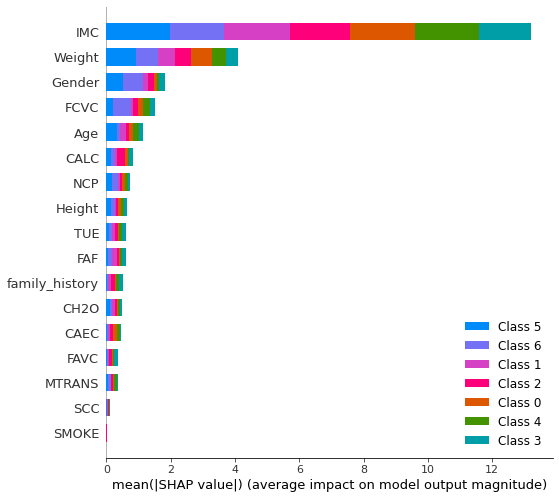

<AxesSubplot:>

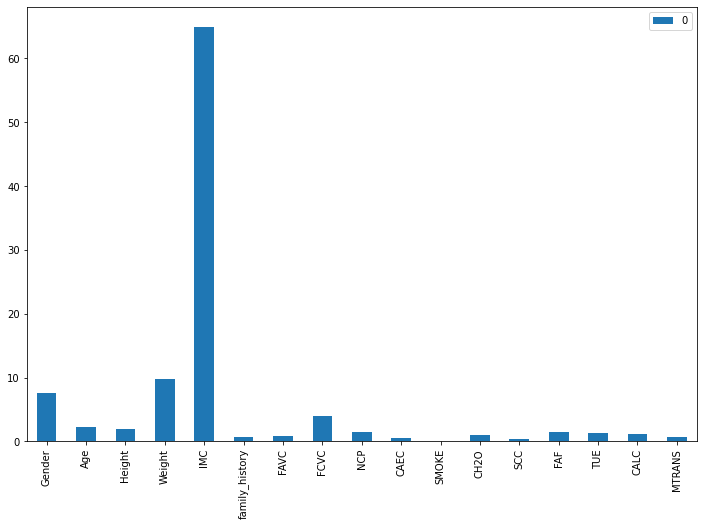

In [41]:
model_CBC = catboost()
pd.DataFrame(model_CBC.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        58
           2       0.98      1.00      0.99        58
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        65

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Accuracy : 0.9976359338061466
F1_score : 0.9976357581044598
Recall : 0.9976359338061466
pression : 0.9976760027246864


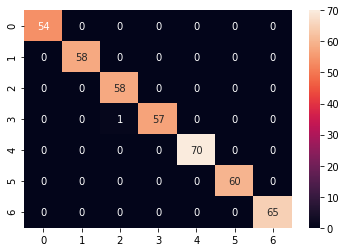

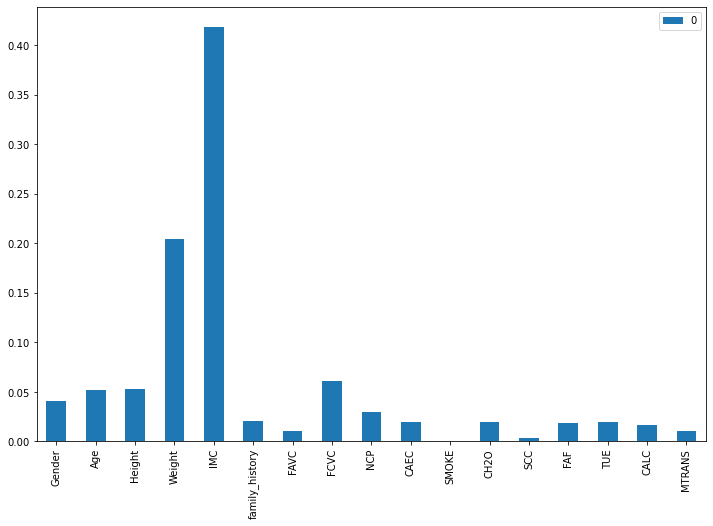

In [42]:
evaluation(rf)

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        58
           2       0.95      0.95      0.95        58
           3       0.93      0.97      0.95        58
           4       1.00      0.97      0.99        70
           5       0.98      1.00      0.99        60
           6       1.00      1.00      1.00        65

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Accuracy : 0.9810874704491725
F1_score : 0.9811729056957965
Recall : 0.9810874704491725
pression : 0.9814414344585254


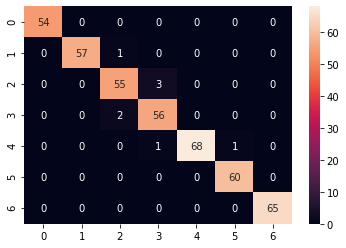

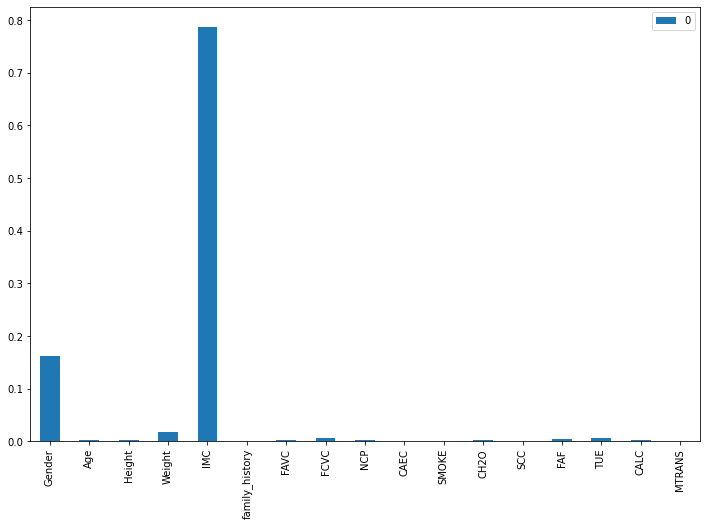

In [43]:
evaluation(dt)

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.98      0.98        58
           2       0.96      0.90      0.93        58
           3       0.90      0.97      0.93        58
           4       0.99      0.96      0.97        70
           5       0.97      1.00      0.98        60
           6       1.00      1.00      1.00        65

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Accuracy : 0.9716312056737588
F1_score : 0.9715789222833399
Recall : 0.9716312056737588
pression : 0.9722790850836213


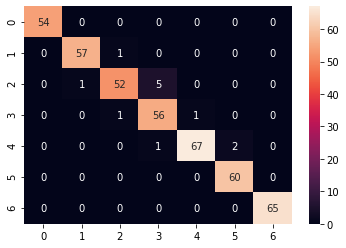

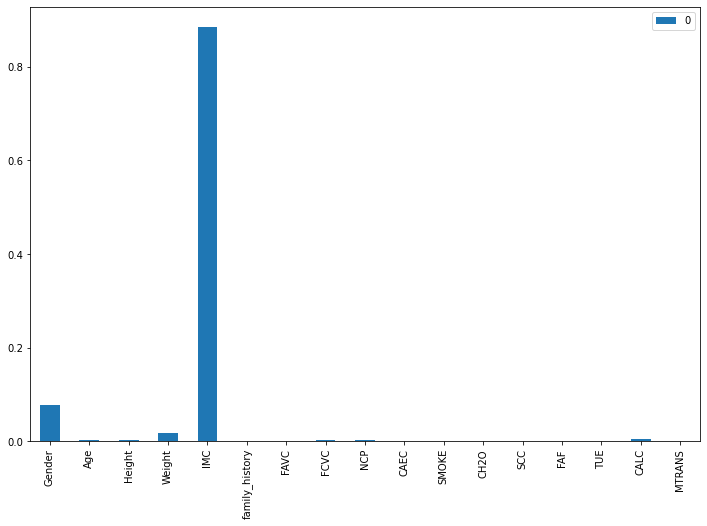

In [44]:
evaluation(gb)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.51      0.98      0.67        58
           2       0.00      0.00      0.00        58
           3       0.49      0.98      0.66        58
           4       0.35      0.99      0.52        70
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        65

    accuracy                           0.43       423
   macro avg       0.19      0.42      0.26       423
weighted avg       0.20      0.43      0.27       423

Accuracy : 0.4326241134751773
F1_score : 0.2679596875549364
Recall : 0.4326241134751773
pression : 0.1957141558205388


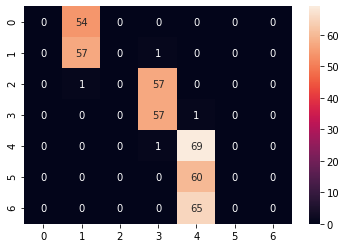

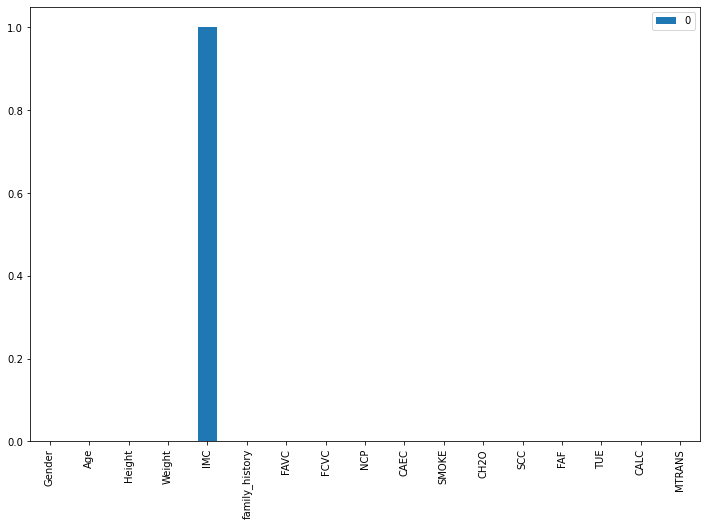

In [45]:
evaluation(ad)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test Data
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        54
           1       0.63      0.62      0.63        58
           2       0.58      0.48      0.53        58
           3       0.53      0.59      0.56        58
           4       0.54      0.53      0.54        70
           5       0.70      0.72      0.71        60
           6       0.79      0.85      0.81        65

    accuracy                           0.66       423
   macro avg       0.66      0.66      0.66       423
weighted avg       0.66      0.66      0.66       423

Accuracy : 0.6595744680851063
F1_score : 0.6572203932913777
Recall : 0.6595744680851063
pression : 0.6569640531373463


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

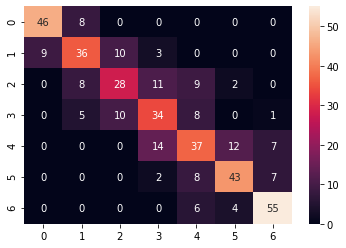

In [46]:
evaluation(lg)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        58
           2       0.96      0.95      0.96        58
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        65

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Accuracy : 0.9881796690307328
F1_score : 0.988198135575799
Recall : 0.988179669030

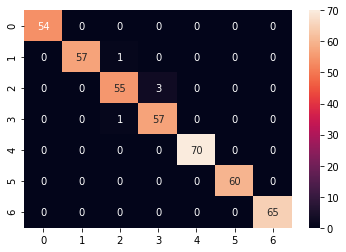

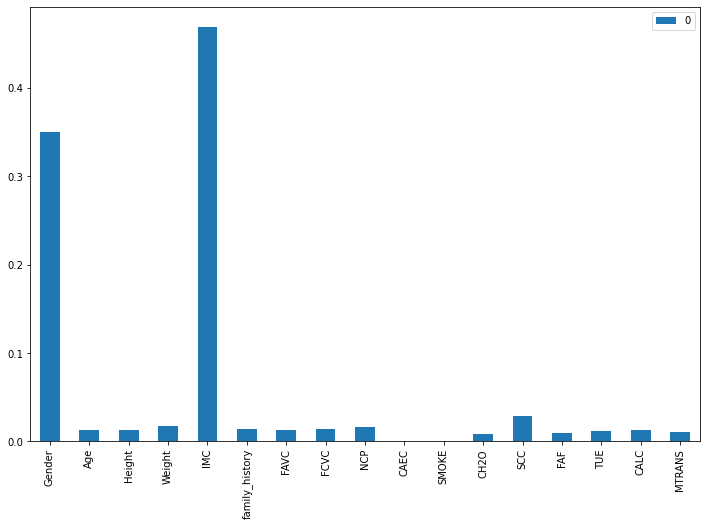

In [47]:
evaluation(xg)

Test Data
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.74      0.85        58
           2       0.84      1.00      0.91        58
           3       0.98      0.91      0.95        58
           4       0.93      0.97      0.95        70
           5       0.98      0.90      0.94        60
           6       0.93      1.00      0.96        65

    accuracy                           0.93       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423

Accuracy : 0.933806146572104
F1_score : 0.932340043573231
Recall : 0.933806146572104
pression : 0.9398935960902591


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

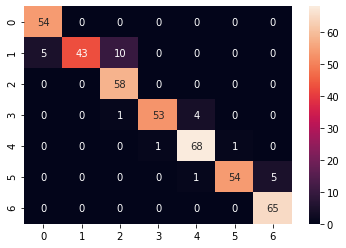

In [48]:
evaluation(knn)

# Drop Height and Weight

In [49]:
df = data.copy()
df = df.rename(columns={'family_history_with_overweight': 'family_history'})
df = df.drop('Weight',axis = 1)
df = df.drop('Height',axis = 1)

X_train, Y_train, X_test, Y_test = GetReadyForML(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Learning rate set to 0.081268
0:	learn: 1.8167165	total: 15.1ms	remaining: 15s
1:	learn: 1.7209131	total: 31.3ms	remaining: 15.6s
2:	learn: 1.6325823	total: 47.6ms	remaining: 15.8s
3:	learn: 1.5717782	total: 60.2ms	remaining: 15s
4:	learn: 1.5086794	total: 72.8ms	remaining: 14.5s
5:	learn: 1.4532656	total: 84.9ms	remaining: 14.1s
6:	learn: 1.4067725	total: 97.3ms	remaining: 13.8s
7:	learn: 1.3611248	total: 110ms	remaining: 13.7s
8:	learn: 1.3216707	total: 123ms	remaining: 13.5s
9:	learn: 1.2830885	total: 135ms	remaining: 13.4s
10:	learn: 1.2463236	total: 149ms	remaining: 13.4s
11:	learn: 1.2141917	total: 163ms	remaining: 13.5s
12:	learn: 1.1837904	total: 178ms	remaining: 13.5s
13:	learn: 1.1546820	total: 192ms	remaining: 13.5s
14:	learn: 1.1333996	total: 206ms	remaining: 13.5s
15:	learn: 1.1107252	total: 217ms	remaining: 13.4s
16:	learn: 1.0872472	total: 229ms	remaining: 13.3s
17:	learn: 1.0662263	total: 240ms	remaining: 13.1s
18:	learn: 1.0434315	total: 254ms	remaining: 13.1s
19:	lear

169:	learn: 0.3493002	total: 2.39s	remaining: 11.7s
170:	learn: 0.3479522	total: 2.4s	remaining: 11.7s
171:	learn: 0.3463163	total: 2.42s	remaining: 11.6s
172:	learn: 0.3448696	total: 2.43s	remaining: 11.6s
173:	learn: 0.3434684	total: 2.44s	remaining: 11.6s
174:	learn: 0.3414294	total: 2.45s	remaining: 11.6s
175:	learn: 0.3392484	total: 2.46s	remaining: 11.5s
176:	learn: 0.3380859	total: 2.47s	remaining: 11.5s
177:	learn: 0.3358786	total: 2.48s	remaining: 11.5s
178:	learn: 0.3341509	total: 2.5s	remaining: 11.5s
179:	learn: 0.3329487	total: 2.51s	remaining: 11.5s
180:	learn: 0.3308477	total: 2.53s	remaining: 11.5s
181:	learn: 0.3293491	total: 2.54s	remaining: 11.4s
182:	learn: 0.3278444	total: 2.56s	remaining: 11.4s
183:	learn: 0.3267325	total: 2.58s	remaining: 11.4s
184:	learn: 0.3246467	total: 2.6s	remaining: 11.4s
185:	learn: 0.3238193	total: 2.61s	remaining: 11.4s
186:	learn: 0.3221379	total: 2.63s	remaining: 11.4s
187:	learn: 0.3210274	total: 2.64s	remaining: 11.4s
188:	learn: 0.3

332:	learn: 0.1969874	total: 5.23s	remaining: 10.5s
333:	learn: 0.1965239	total: 5.24s	remaining: 10.5s
334:	learn: 0.1955839	total: 5.26s	remaining: 10.4s
335:	learn: 0.1951525	total: 5.28s	remaining: 10.4s
336:	learn: 0.1948791	total: 5.29s	remaining: 10.4s
337:	learn: 0.1942493	total: 5.3s	remaining: 10.4s
338:	learn: 0.1936388	total: 5.32s	remaining: 10.4s
339:	learn: 0.1931886	total: 5.33s	remaining: 10.3s
340:	learn: 0.1927251	total: 5.34s	remaining: 10.3s
341:	learn: 0.1922708	total: 5.35s	remaining: 10.3s
342:	learn: 0.1915672	total: 5.36s	remaining: 10.3s
343:	learn: 0.1911150	total: 5.38s	remaining: 10.3s
344:	learn: 0.1903489	total: 5.39s	remaining: 10.2s
345:	learn: 0.1899547	total: 5.4s	remaining: 10.2s
346:	learn: 0.1890704	total: 5.41s	remaining: 10.2s
347:	learn: 0.1883823	total: 5.42s	remaining: 10.2s
348:	learn: 0.1875306	total: 5.44s	remaining: 10.1s
349:	learn: 0.1870821	total: 5.45s	remaining: 10.1s
350:	learn: 0.1863752	total: 5.46s	remaining: 10.1s
351:	learn: 0.

494:	learn: 0.1330102	total: 7.26s	remaining: 7.41s
495:	learn: 0.1327099	total: 7.27s	remaining: 7.39s
496:	learn: 0.1325067	total: 7.29s	remaining: 7.38s
497:	learn: 0.1323221	total: 7.31s	remaining: 7.37s
498:	learn: 0.1320677	total: 7.33s	remaining: 7.36s
499:	learn: 0.1318386	total: 7.36s	remaining: 7.36s
500:	learn: 0.1315574	total: 7.41s	remaining: 7.38s
501:	learn: 0.1313280	total: 7.45s	remaining: 7.39s
502:	learn: 0.1311751	total: 7.49s	remaining: 7.4s
503:	learn: 0.1306609	total: 7.51s	remaining: 7.39s
504:	learn: 0.1303619	total: 7.53s	remaining: 7.38s
505:	learn: 0.1300284	total: 7.54s	remaining: 7.37s
506:	learn: 0.1298072	total: 7.6s	remaining: 7.39s
507:	learn: 0.1295547	total: 7.62s	remaining: 7.38s
508:	learn: 0.1291955	total: 7.64s	remaining: 7.37s
509:	learn: 0.1289856	total: 7.67s	remaining: 7.37s
510:	learn: 0.1286624	total: 7.69s	remaining: 7.36s
511:	learn: 0.1283941	total: 7.71s	remaining: 7.35s
512:	learn: 0.1281940	total: 7.73s	remaining: 7.34s
513:	learn: 0.

655:	learn: 0.0978588	total: 10.5s	remaining: 5.51s
656:	learn: 0.0977448	total: 10.5s	remaining: 5.5s
657:	learn: 0.0976003	total: 10.6s	remaining: 5.49s
658:	learn: 0.0973669	total: 10.6s	remaining: 5.49s
659:	learn: 0.0971365	total: 10.6s	remaining: 5.49s
660:	learn: 0.0970267	total: 10.7s	remaining: 5.47s
661:	learn: 0.0968538	total: 10.7s	remaining: 5.45s
662:	learn: 0.0966510	total: 10.7s	remaining: 5.44s
663:	learn: 0.0964725	total: 10.7s	remaining: 5.43s
664:	learn: 0.0963617	total: 10.8s	remaining: 5.42s
665:	learn: 0.0962146	total: 10.8s	remaining: 5.41s
666:	learn: 0.0961246	total: 10.8s	remaining: 5.39s
667:	learn: 0.0959927	total: 10.8s	remaining: 5.38s
668:	learn: 0.0958119	total: 10.8s	remaining: 5.36s
669:	learn: 0.0956388	total: 10.9s	remaining: 5.35s
670:	learn: 0.0955266	total: 10.9s	remaining: 5.33s
671:	learn: 0.0953823	total: 10.9s	remaining: 5.32s
672:	learn: 0.0952150	total: 10.9s	remaining: 5.3s
673:	learn: 0.0950640	total: 10.9s	remaining: 5.29s
674:	learn: 0.

826:	learn: 0.0746136	total: 13s	remaining: 2.72s
827:	learn: 0.0745010	total: 13s	remaining: 2.7s
828:	learn: 0.0743411	total: 13s	remaining: 2.69s
829:	learn: 0.0742175	total: 13s	remaining: 2.67s
830:	learn: 0.0741240	total: 13.1s	remaining: 2.65s
831:	learn: 0.0740439	total: 13.1s	remaining: 2.64s
832:	learn: 0.0739672	total: 13.1s	remaining: 2.62s
833:	learn: 0.0738611	total: 13.1s	remaining: 2.61s
834:	learn: 0.0736754	total: 13.1s	remaining: 2.59s
835:	learn: 0.0736104	total: 13.1s	remaining: 2.57s
836:	learn: 0.0735123	total: 13.1s	remaining: 2.56s
837:	learn: 0.0734616	total: 13.1s	remaining: 2.54s
838:	learn: 0.0733860	total: 13.2s	remaining: 2.52s
839:	learn: 0.0732903	total: 13.2s	remaining: 2.51s
840:	learn: 0.0731556	total: 13.2s	remaining: 2.49s
841:	learn: 0.0729831	total: 13.2s	remaining: 2.48s
842:	learn: 0.0728764	total: 13.2s	remaining: 2.46s
843:	learn: 0.0728195	total: 13.2s	remaining: 2.44s
844:	learn: 0.0727265	total: 13.2s	remaining: 2.43s
845:	learn: 0.0725702

994:	learn: 0.0595013	total: 15.4s	remaining: 77.5ms
995:	learn: 0.0593931	total: 15.4s	remaining: 62ms
996:	learn: 0.0593387	total: 15.4s	remaining: 46.5ms
997:	learn: 0.0592757	total: 15.5s	remaining: 31ms
998:	learn: 0.0592057	total: 15.5s	remaining: 15.5ms
999:	learn: 0.0590841	total: 15.5s	remaining: 0us
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.74      0.69      0.71        58
           2       0.87      0.79      0.83        58
           3       0.88      0.78      0.83        58
           4       0.76      0.93      0.84        70
           5       0.92      0.97      0.94        60
           6       1.00      1.00      1.00        65

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.86      0.86      0.86       423

[[45  3  2  1  3  0  0]
 [ 5 40  5  2  5  1  0]
 [ 0  4 46  0  8  0  0]
 [ 1  6  0 45  4  2 

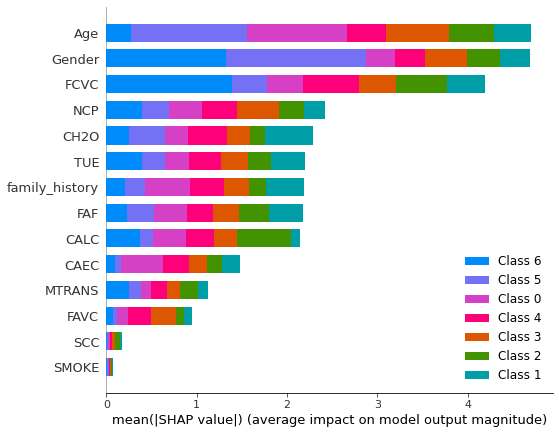

<AxesSubplot:>

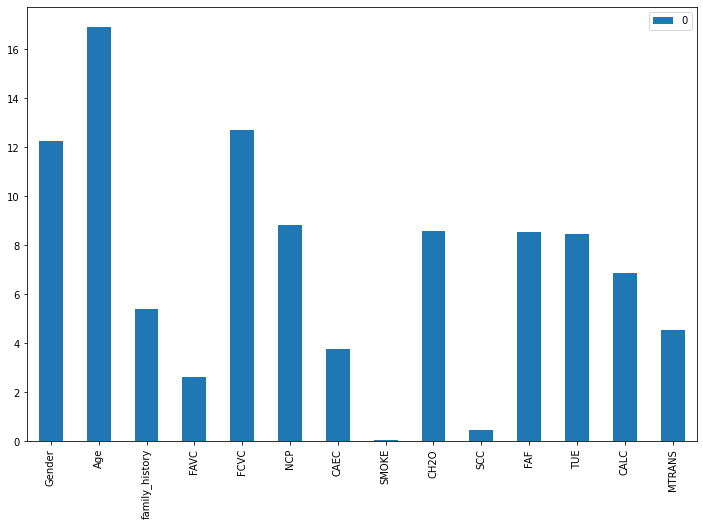

In [50]:
model_CBC = catboost()
pd.DataFrame(model_CBC.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

Test Data
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.70      0.66      0.68        58
           2       0.85      0.76      0.80        58
           3       0.83      0.76      0.79        58
           4       0.80      0.90      0.85        70
           5       0.88      0.98      0.93        60
           6       1.00      1.00      1.00        65

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.85       423
weighted avg       0.85      0.85      0.85       423

Accuracy : 0.851063829787234
F1_score : 0.8489859090877533
Recall : 0.851063829787234
pression : 0.8500900223320177


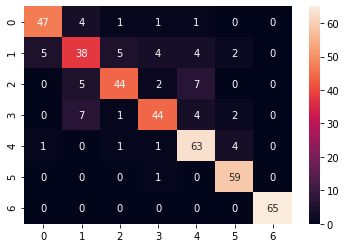

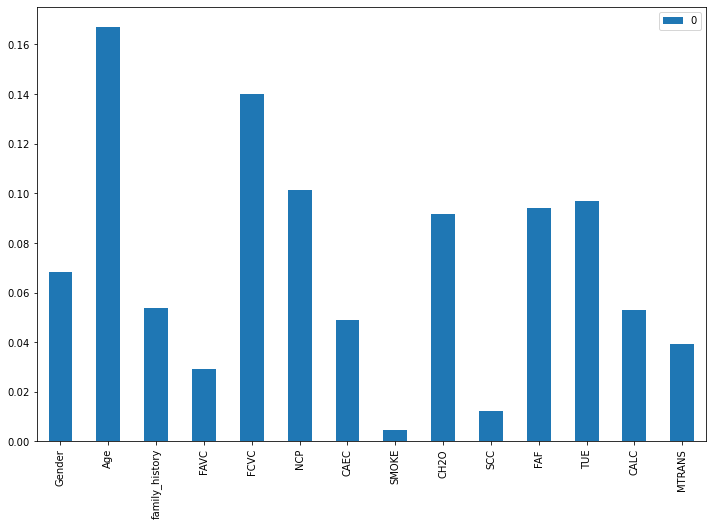

In [51]:
evaluation(rf)

Test Data
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.50      0.48      0.49        58
           2       0.73      0.69      0.71        58
           3       0.65      0.64      0.64        58
           4       0.69      0.81      0.75        70
           5       0.88      0.85      0.86        60
           6       0.98      1.00      0.99        65

    accuracy                           0.75       423
   macro avg       0.75      0.74      0.74       423
weighted avg       0.75      0.75      0.75       423

Accuracy : 0.7494089834515366
F1_score : 0.7486858583190924
Recall : 0.7494089834515366
pression : 0.7507139535467351


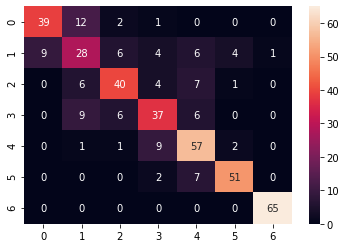

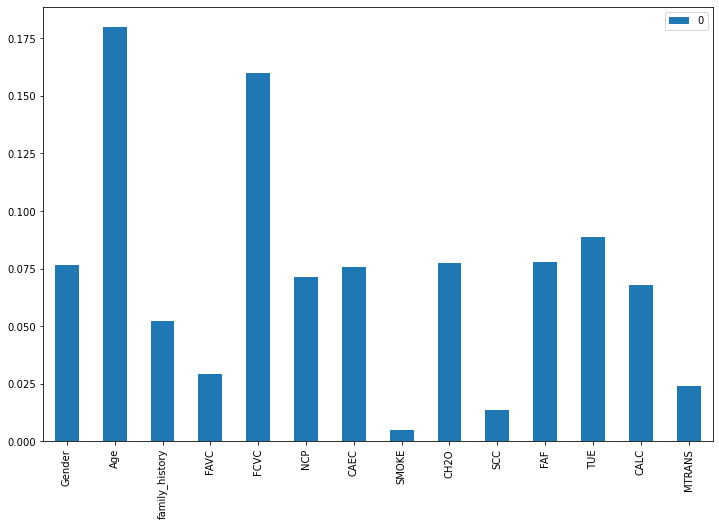

In [52]:
evaluation(dt)

Test Data
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        54
           1       0.76      0.67      0.72        58
           2       0.78      0.72      0.75        58
           3       0.83      0.60      0.70        58
           4       0.69      0.86      0.76        70
           5       0.84      0.98      0.91        60
           6       1.00      1.00      1.00        65

    accuracy                           0.82       423
   macro avg       0.82      0.81      0.81       423
weighted avg       0.82      0.82      0.81       423

Accuracy : 0.817966903073286
F1_score : 0.8145846579926184
Recall : 0.817966903073286
pression : 0.8218550266224802


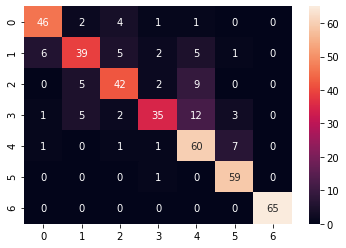

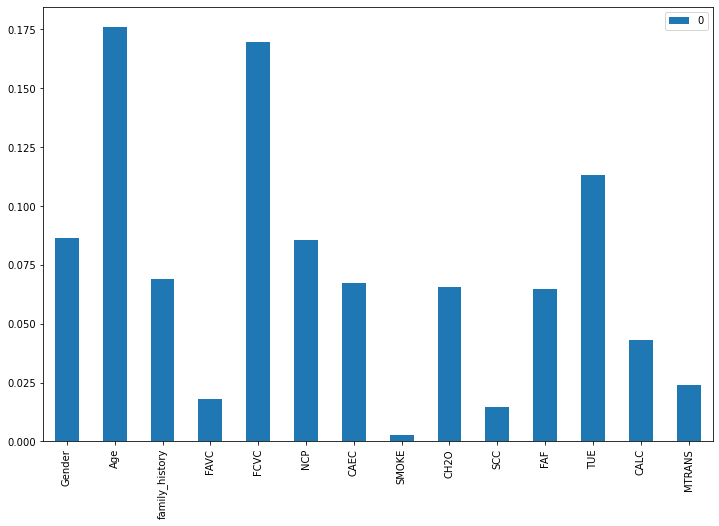

In [53]:
evaluation(gb)

Test Data
              precision    recall  f1-score   support

           0       0.74      0.31      0.44        54
           1       0.67      0.24      0.35        58
           2       0.67      0.07      0.12        58
           3       0.18      0.03      0.06        58
           4       0.23      0.53      0.32        70
           5       0.29      0.63      0.40        60
           6       0.90      1.00      0.95        65

    accuracy                           0.42       423
   macro avg       0.53      0.40      0.38       423
weighted avg       0.52      0.42      0.39       423

Accuracy : 0.41843971631205673
F1_score : 0.38578416480572836
Recall : 0.41843971631205673
pression : 0.5204876483247675


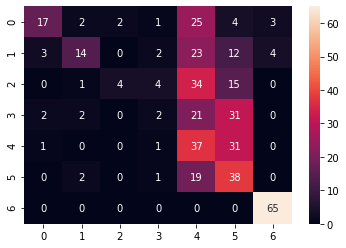

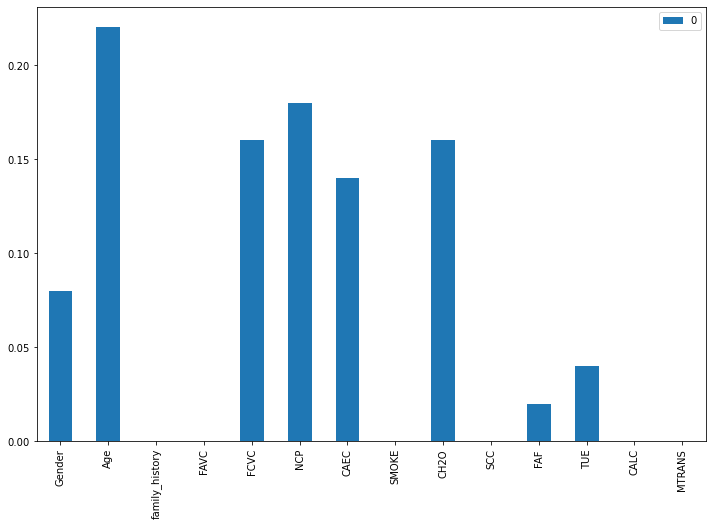

In [54]:
evaluation(ad)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test Data
              precision    recall  f1-score   support

           0       0.64      0.56      0.59        54
           1       0.60      0.31      0.41        58
           2       0.40      0.29      0.34        58
           3       0.40      0.10      0.16        58
           4       0.45      0.63      0.52        70
           5       0.51      0.88      0.65        60
           6       0.75      1.00      0.86        65

    accuracy                           0.55       423
   macro avg       0.53      0.54      0.50       423
weighted avg       0.53      0.55      0.51       423

Accuracy : 0.5508274231678487
F1_score : 0.5109755473675054
Recall : 0.5508274231678487
pression : 0.5349028224389256


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

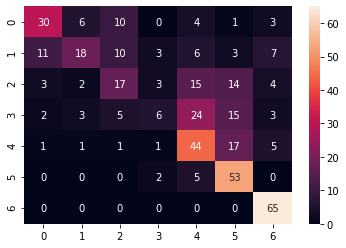

In [55]:
evaluation(lg)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Data
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        54
           1       0.74      0.78      0.76        58
           2       0.84      0.74      0.79        58
           3       0.85      0.76      0.80        58
           4       0.79      0.89      0.84        70
           5       0.89      0.98      0.94        60
           6       1.00      1.00      1.00        65

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.85       423
weighted avg       0.85      0.85      0.85       423

Accuracy : 0.8534278959810875
F1_score : 0.8522931089866824
Recall : 0.85342789598

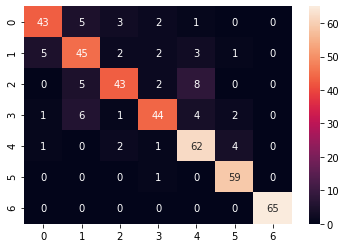

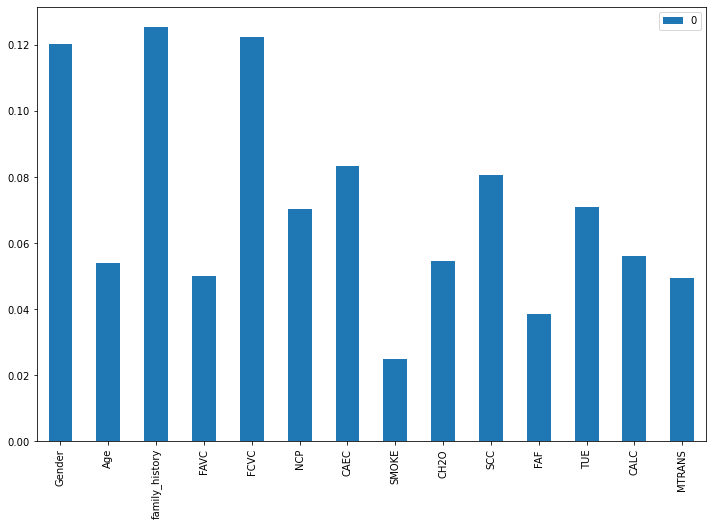

In [56]:
evaluation(xg)

Test Data
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        54
           1       0.68      0.22      0.34        58
           2       0.63      0.64      0.63        58
           3       0.81      0.59      0.68        58
           4       0.70      0.81      0.75        70
           5       0.74      1.00      0.85        60
           6       0.88      1.00      0.94        65

    accuracy                           0.75       423
   macro avg       0.74      0.74      0.72       423
weighted avg       0.74      0.75      0.72       423

Accuracy : 0.7470449172576832
F1_score : 0.7211900070020926
Recall : 0.7470449172576832
pression : 0.7425913460239355


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

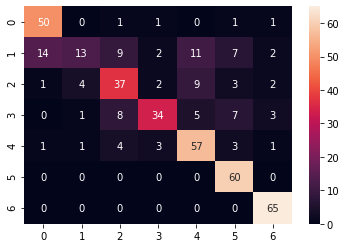

In [57]:
evaluation(knn)